In [2]:
#Importing Essential libraries & packages 
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


Using TensorFlow backend.


In [0]:
#Defining Batch size & Input size 

batch_size = 128
num_classes = 10
epochs = 15

# input image dimensions
img_rows, img_cols = 28, 28

In [4]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [6]:
# Converting Train & Test Data to Float type & Normalizing the it
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
#Defining a Funtion to print the Train & Validation loss after each epoch 
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

## Model 1 - CNN with 2 convolutional layers & kernel size of (3x3)

In [12]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

# Initializing the model & adding First layer 
model_one = Sequential()
model_one.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu', padding='same', 
                 input_shape=input_shape))

#Adding second layer 
model_one.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_one.add(MaxPooling2D(pool_size=(2, 2)))
model_one.add(BatchNormalization())
model_one.add(Dropout(0.25))
model_one.add(Flatten())

model_one.add(Dense(128, activation='relu'))
model_one.add(BatchNormalization())
model_one.add(Dropout(0.30))
model_one.add(Dense(num_classes, activation='softmax'))

model_one.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_one = model_one.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))

score_one = model_one.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_one[0])
print('Test accuracy:', score_one[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 12s 205us/step - loss: 0.1262 - acc: 0.9626 - val_loss: 0.0461 - val_acc: 0.9855
Epoch 2/15
60000/60000 [==============================] - 11s 191us/step - loss: 0.0491 - acc: 0.9854 - val_loss: 0.0414 - val_acc: 0.9867
Epoch 3/15
60000/60000 [==============================] - 11s 190us/step - loss: 0.0347 - acc: 0.9890 - val_loss: 0.0374 - val_acc: 0.9885
Epoch 4/15
60000/60000 [==============================] - 11s 191us/step - loss: 0.0257 - acc: 0.9919 - val_loss: 0.0444 - val_acc: 0.9861
Epoch 5/15
60000/60000 [==============================] - 11s 191us/step - loss: 0.0207 - acc: 0.9932 - val_loss: 0.0346 - val_acc: 0.9895
Epoch 6/15
60000/60000 [==============================] - 11s 190us/step - loss: 0.0161 - acc: 0.9950 - val_loss: 0.0347 - val_acc: 0.9904
Epoch 7/15
60000/60000 [==============================] - 11s 191us/step - loss: 0.0140 - acc: 0.9953 - val_loss: 0.

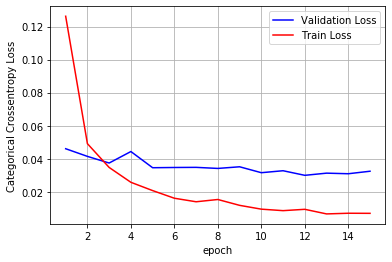

In [13]:
%matplotlib inline
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history_one.history['val_loss']
ty = history_one.history['loss']
plt_dynamic(x, vy, ty, ax)

## Model 2 - CNN with 3 convolutional layers & kernel size of (4x4)

In [19]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

# Initializing the model & adding First layer 
model_two = Sequential()
#Adding First layer
model_two.add(Conv2D(32, kernel_size=(4, 4),
                 activation='relu', padding ='same',
                 input_shape=input_shape))

#Adding second layer 
model_two.add(Conv2D(64, (4, 4), activation='relu', padding='same'))
model_two.add(MaxPooling2D(pool_size=(3, 3)))
model_two.add(BatchNormalization())
model_two.add(Dropout(0.25))

#Adding third layer 
model_two.add(Conv2D(128, (4, 4), activation='relu', padding='same'))
model_two.add(MaxPooling2D(pool_size=(3, 3)))
model_two.add(BatchNormalization())
model_two.add(Dropout(0.25))
model_two.add(Flatten())


#Dense layer & Output layer
model_two.add(Dense(256, activation='relu'))
model_two.add(BatchNormalization())
model_two.add(Dropout(0.25))
model_two.add(Dense(num_classes, activation='softmax'))

model_two.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_two = model_two.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))

score_two = model_two.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_two[0])
print('Test accuracy:', score_two[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 16s 270us/step - loss: 0.1293 - acc: 0.9591 - val_loss: 0.0353 - val_acc: 0.9876
Epoch 2/15
60000/60000 [==============================] - 14s 237us/step - loss: 0.0407 - acc: 0.9873 - val_loss: 0.0348 - val_acc: 0.9889
Epoch 3/15
60000/60000 [==============================] - 14s 236us/step - loss: 0.0311 - acc: 0.9904 - val_loss: 0.0310 - val_acc: 0.9904
Epoch 4/15
60000/60000 [==============================] - 14s 235us/step - loss: 0.0254 - acc: 0.9921 - val_loss: 0.0255 - val_acc: 0.9916
Epoch 5/15
60000/60000 [==============================] - 14s 236us/step - loss: 0.0239 - acc: 0.9923 - val_loss: 0.0283 - val_acc: 0.9914
Epoch 6/15
60000/60000 [==============================] - 14s 241us/step - loss: 0.0190 - acc: 0.9941 - val_loss: 0.0201 - val_acc: 0.9942
Epoch 7/15
60000/60000 [==============================] - 14s 236us/step - loss: 0.0189 - acc: 0.9940 - val_loss: 0.

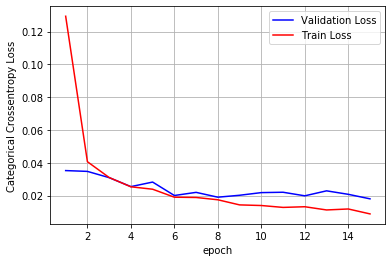

In [20]:
%matplotlib inline
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history_two.history['val_loss']
ty = history_two.history['loss']
plt_dynamic(x, vy, ty, ax)

## Model 3 - CNN with 5 convolutional layers & kernel size of (5x5)

In [28]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

# Initializing the model & adding First layer 
model_four = Sequential()
#Adding First layer
model_four.add(Conv2D(16, kernel_size=(5, 5),
                 activation='relu', padding ='same',
                 input_shape=input_shape))


#Adding second layer
model_four.add(Conv2D(32, kernel_size=(5, 5), 
                 activation='relu', padding ='same',
                 input_shape=input_shape))
model_four.add(MaxPooling2D(pool_size=(3, 3)))
model_four.add(Dropout(0.25))

#Adding Third layer 
model_four.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model_four.add(BatchNormalization())
model_four.add(Dropout(0.25))

#Adding Fourth layer 
model_four.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model_four.add(MaxPooling2D(pool_size=(3, 3)))
model_four.add(BatchNormalization())
model_four.add(Dropout(0.25))

#Adding Fifth layer 
model_four.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
model_four.add(MaxPooling2D(pool_size=(3, 3)))
model_four.add(BatchNormalization())
model_four.add(Dropout(0.25))
model_four.add(Flatten())


#Dense layer & Output layer
model_four.add(Dense(256, activation='relu'))
model_four.add(BatchNormalization())
model_four.add(Dropout(0.25))
model_four.add(Dense(num_classes, activation='softmax'))

model_four.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_four = model_four.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))

score_four = model_four.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_four[0])
print('Test accuracy:', score_four[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 20s 335us/step - loss: 0.1939 - acc: 0.9398 - val_loss: 0.0452 - val_acc: 0.9863
Epoch 2/15
60000/60000 [==============================] - 16s 274us/step - loss: 0.0584 - acc: 0.9821 - val_loss: 0.0273 - val_acc: 0.9907
Epoch 3/15
60000/60000 [==============================] - 17s 276us/step - loss: 0.0450 - acc: 0.9863 - val_loss: 0.0306 - val_acc: 0.9898
Epoch 4/15
60000/60000 [==============================] - 16s 275us/step - loss: 0.0373 - acc: 0.9885 - val_loss: 0.0213 - val_acc: 0.9930
Epoch 5/15
60000/60000 [==============================] - 17s 276us/step - loss: 0.0319 - acc: 0.9902 - val_loss: 0.0281 - val_acc: 0.9909
Epoch 6/15
60000/60000 [==============================] - 16s 274us/step - loss: 0.0291 - acc: 0.9907 - val_loss: 0.0200 - val_acc: 0.9938
Epoch 7/15
60000/60000 [==============================] - 16s 273us/step - loss: 0.0261 - acc: 0.9919 - val_loss: 0.

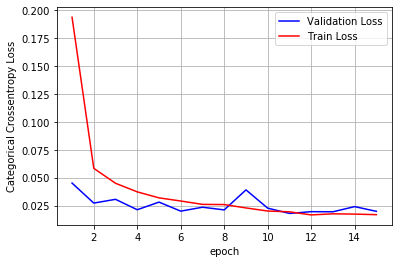

In [29]:
%matplotlib inline
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history_four.history['val_loss']
ty = history_four.history['loss']
plt_dynamic(x, vy, ty, ax)

In [31]:
# Please write down few lines about what you observed from this assignment.
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable
x = PrettyTable()
x.field_names = [ "Model", "Number of Layers", "Kernel size", "Train Accuracy", "Test Accuracy"]
x.add_row(["Convolutional Neural Network", "2", "3x3", "0.9975", "0.9907"])
x.add_row(["Convolutional Neural Network", "3", "4x4", "0.9972", "0.9951"])
x.add_row(["Convolutional Neural Network", "5", "5x5", "0.9945", "0.9950"])
print(x)

+------------------------------+------------------+-------------+----------------+---------------+
|            Model             | Number of Layers | Kernel size | Train Accuracy | Test Accuracy |
+------------------------------+------------------+-------------+----------------+---------------+
| Convolutional Neural Network |        2         |     3x3     |     0.9975     |     0.9907    |
| Convolutional Neural Network |        3         |     4x4     |     0.9972     |     0.9951    |
| Convolutional Neural Network |        5         |     5x5     |     0.9945     |     0.9950    |
+------------------------------+------------------+-------------+----------------+---------------+
